>
> # MaaS Sim tutorial
>
> ## External functionalities
>
-----
example of simulations with various functionalities included

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import random

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.traveller import travellerEvent
from MaaSSim.driver import driverEvent
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.utils import dummy_False
import pandas as pd
import logging

In [3]:
params = get_config('../../data/config/default.json')  # load configuration

In [4]:
params.times.patience = 3600  # 1 hour of simulation
params.simTime = 1  # 1 hour of simulation
params.nP = 10  # reuqests (and passengers)
params.nV = 10  # vehicles
params.nD = 1

functions to reject with probability of 20 and 80% respectively

In [5]:
def rand_reject8(**kwargs):
    return random.random()>=0.2

def rand_reject2(**kwargs):
    return random.random()>=0.8

In [6]:
params = get_config('../../data/config/delft.json')  # load configuration
params.times.patience = 3600  # 1 hour of simulation
params.simTime = 1  # 1 hour of simulation
params.nP = 100  # reuqests (and passengers)
params.nV = 100  # vehicles
params.nD = 1

In [7]:
# no functions
sim2 = simulate(params=params, f_trav_mode=dummy_False,f_driver_decline=dummy_False,f_platform_choice=dummy_False, logger_level = logging.CRITICAL)
# driver request decline behaviour
sim2.make_and_run(f_trav_mode=dummy_False,
                      f_driver_decline=rand_reject8)
# traveller rejects offers
sim2.make_and_run(f_trav_mode=rand_reject8,
                      f_driver_decline=dummy_False)
# both reject
sim2.make_and_run(f_trav_mode=rand_reject8,
                      f_driver_decline=rand_reject8)

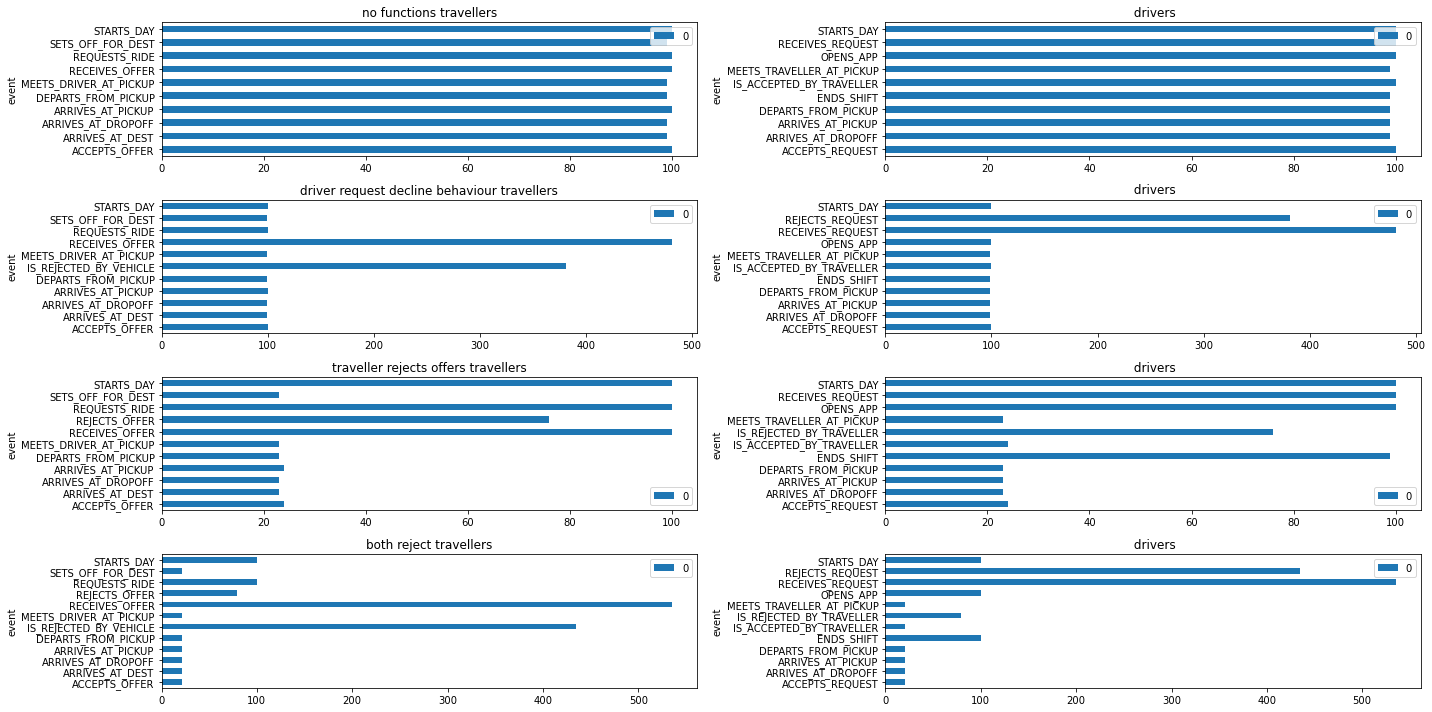

In [8]:
import matplotlib.pyplot as plt
titles = 'no functions','driver request decline behaviour','traveller rejects offers', 'both reject'
fig, ax = plt.subplots(4,2, figsize = (20,10))
for i in range(4):
    df = sim2.runs[i].trips.groupby('event').size().to_frame()
    df.plot(kind='barh', ax = ax[i][0], title = titles[i]+ " travellers")
    df = sim2.runs[i].rides.groupby('event').size().to_frame()
    df.plot(kind='barh', ax = ax[i][1], title =  " drivers")
fig.tight_layout()

> driver repositioning

In [9]:
from MaaSSim.driver import VehicleAgent, driverEvent, f_repos, f_dummy_repos
sim = simulate(inData, params = params, _print = False, f_driver_repos = f_repos, logger_level = logging.WARNING) 
pd.DataFrame(sim.runs[0].rides.event.unique())

12-10-20 15:18:24-WARNING-Setting up 1h simulation at 2020-10-12 14:49:01 for 100 vehicles and 100 passengers in Delft, Netherlands
12-10-20 15:18:24-WARNING-pax    2  got rejected by vehicle 30               2020-10-12 14:49:34
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:49:55
12-10-20 15:18:24-WARNING-pax    3  got rejected by vehicle 78               2020-10-12 14:4

,0
0,STARTS_DAY
1,OPENS_APP
2,RECEIVES_REQUEST
3,IS_REJECTED_BY_TRAVELLER
4,REJECTS_REQUEST
5,ENDS_SHIFT
6,ACCEPTS_REQUEST
7,IS_ACCEPTED_BY_TRAVELLER
8,ARRIVES_AT_PICKUP
9,MEETS_TRAVELLER_AT_PICKUP


---